Здесь будет показан мой вариант построения модели для предсказание цен домов. Весь датасет взят с соревнования на kaggle.com. Цель данной работы показать навыки, которыми я владею.

**Импортируем необходимые библиотеки**

In [194]:
import numpy as np # linear algebra
import pandas as pd # data processing, data importing
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import norm, skew
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold, GridSearchCV

Импортируем тестовый и тренировочный датасеты

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

Проверяем размер тренировочного датасета

In [3]:
train.shape

(1460, 81)

Сохраняем столбец с ценой отдельно

In [4]:
#saving outcome in Sale_Price
Sale_Price=train.iloc[:,80]
Sale_Price.shape

(1460,)

Смотрим общую статистику по тренировочному датасету

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Удаляем столбец с ценой, далее будем объединять тестовый и тренировочный датасеты

In [6]:
train=train.drop(["SalePrice"],axis=1)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
test.shape

(1459, 80)

In [9]:
data= pd.concat([train,test], keys=['x', 'y'])
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
x 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
  1   2          20       RL         80.0     9600   Pave   NaN      Reg   
  2   3          60       RL         68.0    11250   Pave   NaN      IR1   
  3   4          70       RL         60.0     9550   Pave   NaN      IR1   
  4   5          60       RL         84.0    14260   Pave   NaN      IR1   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
x 0         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
  1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
  2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
  3         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
  4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
x 0       0      2    2008        WD         Normal  
  1       0      5    2007        WD         Normal  
  2       0      9    2008        WD         Normal  
  3       0      2    2006        WD        Abnorml  
  4       0     12    2008        WD         Normal  

[5 rows x 80 columns]

Проверяем размерность итогового датасета

In [10]:
data.shape

(2919, 80)

**Подготовка данных и работа с признаками(EDA)**

Ищем пропущенные значения, строим график для наглядности и удаляем столбцы, в которых более 80 % пропущенных значений.

Получаем список пропущенных значений по общему количеству

In [11]:
data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
dtype: int64

В процентном выражении:

In [12]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

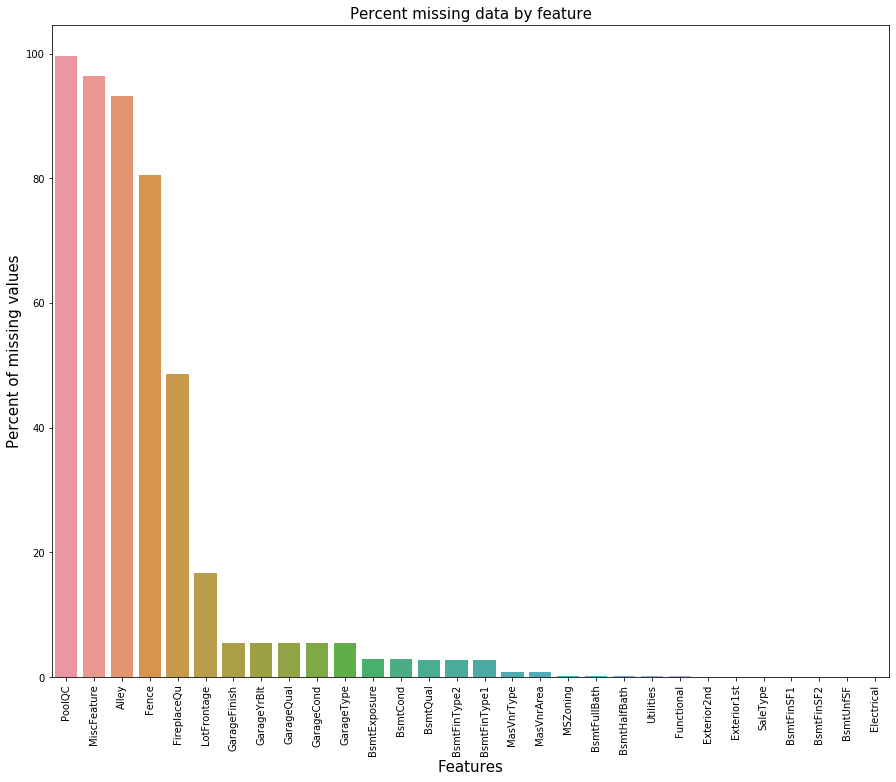

In [13]:
ay, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=data_na.index, y=data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [14]:
data=data.drop(["Id","Fence","MiscFeature","PoolQC","Alley"],axis=1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, (x, 0) to (y, 1458)
Data columns (total 75 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType    

Находим столбцы с числовыми значениями. Отсутвующие значения заменяем средними.

In [16]:
num_col=data._get_numeric_data().columns.tolist()
num_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [17]:

for col in num_col:
    data[col].fillna(data[col].mean(),inplace=True)

Находим столбцы с категориальными признаками. Отсутвующие значения заменяем модой (наиболее часто встречающееся значение).

In [18]:
cat_col=set(data.columns)-set(num_col)
cat_col

{'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

In [19]:
for col in cat_col:
    data[col].fillna(data[col].mode()[0],inplace=True)

Посчитаем общее количество каждого значения в категориальном признаке. Можно поэкспериментировать с удалением признаков в которох максимально доминирует одно значение, но пока все оставим все как есть

In [20]:
for i in cat_col:
    print(data[i].value_counts())

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
SBrkr    2672
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64
Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64
WD       2526
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
Y    2723
N     196
Name: CentralAir, dtype: int64
No    1986
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64
Lvl    2622
HLS     120
Bnk     117
Low   

In [ ]:
#droping some unnecessary cat_features because they have 80% + same value so in theory they can't effect score
#data=data.drop(["GarageCond","RoofMatl","Heating","Condition2","BsmtCond","GarageQual","SaleType","CentralAir","Functional","FireplaceQu","Electrical","LandSlope","ExterCond","Condition1"],axis=1)

Проверяем корреляцию признаков, строим heatmap. Можно эксперементировать с удалением признаков с низкой корреляцией к зависимой величине (SalePrice). Пока оставим все как есть.

In [21]:
corr_dataset = train.copy()
corr_dataset['SalePrice'] = Sale_Price

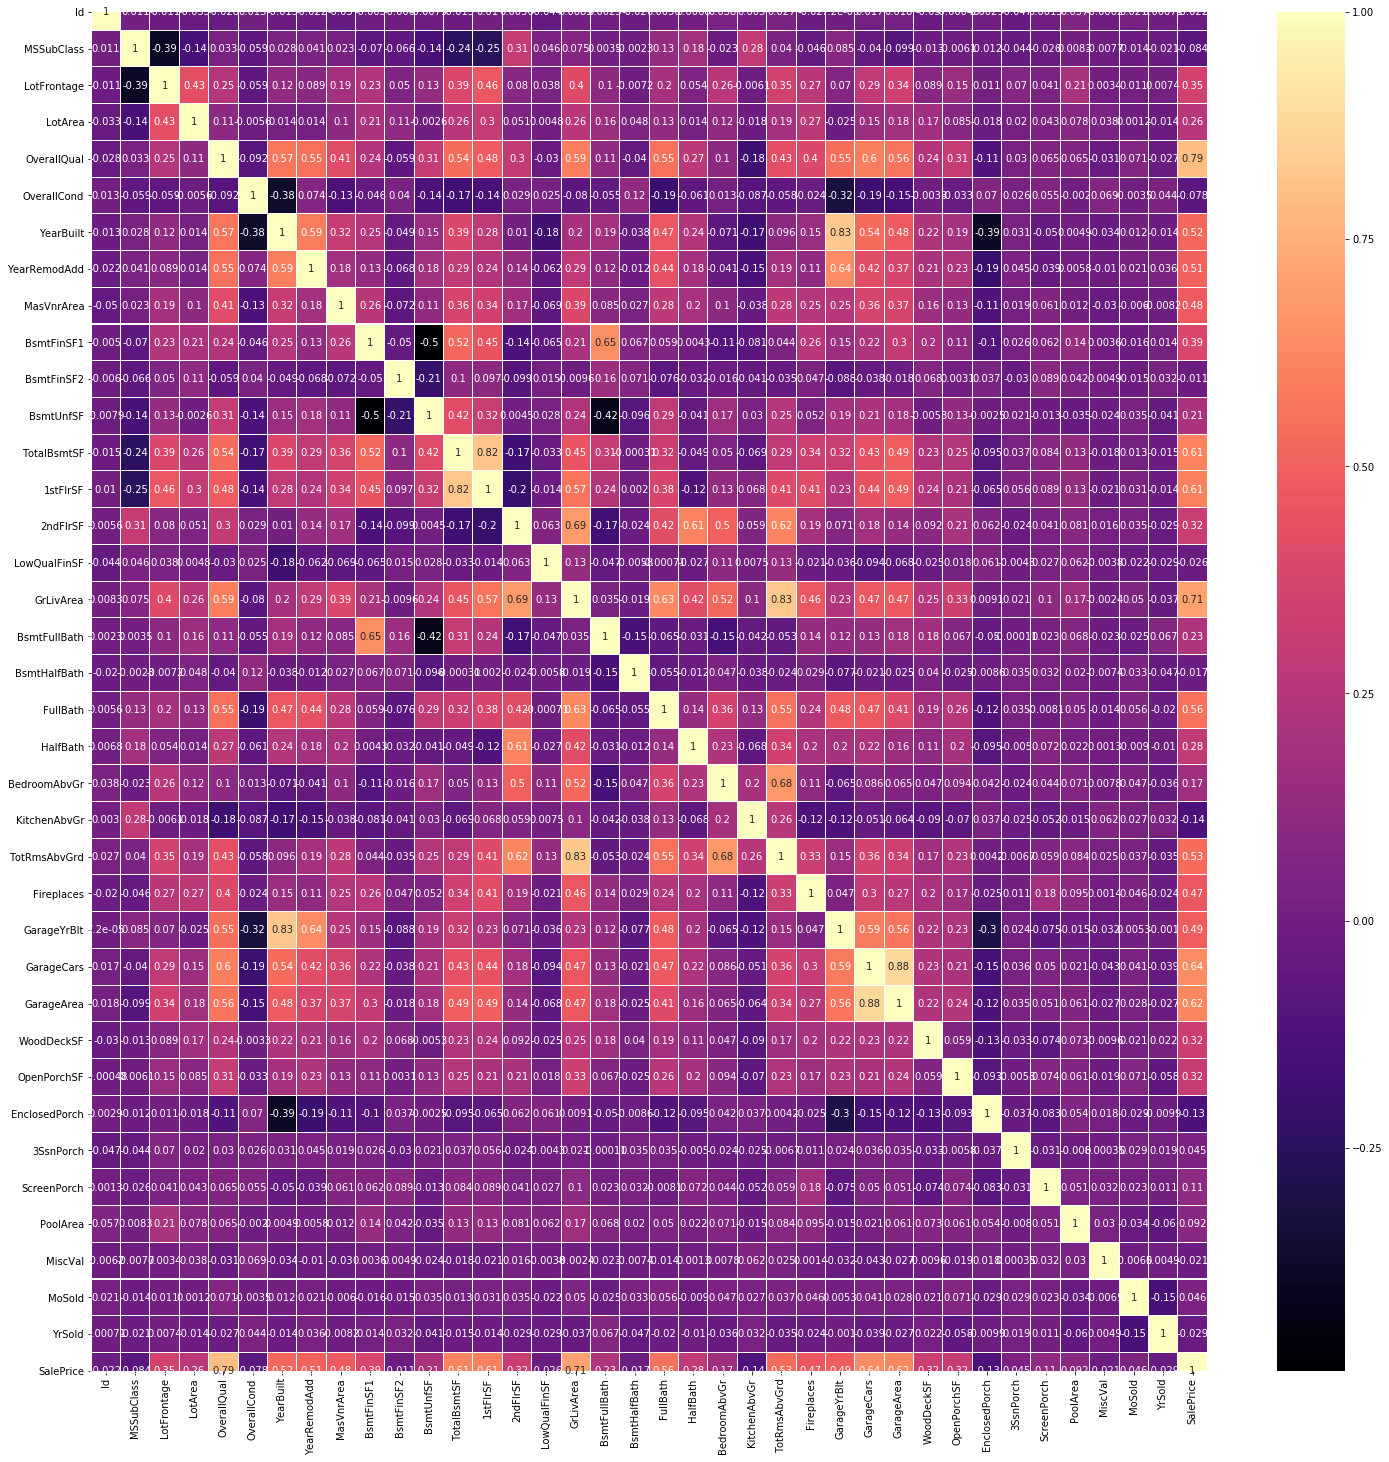

In [22]:
plt.figure(figsize=(25, 25))
sns.heatmap(corr_dataset.corr(), annot=True, linewidths=0.05,cmap="magma")
plt.show()

In [160]:
#droping some unnecessary num_features by using heatmap
#data=data.drop(["MSSubClass","OverallCond","BsmtFinSF2","KitchenAbvGr","BsmtHalfBath","LowQualFinSF","YrSold","MoSold","3SsnPorch","EnclosedPorch","PoolArea","ScreenPorch"],axis=1)

In [23]:
data.shape

(2919, 75)

 Для категориальных признаков делаем "one hot" преобразование. В итоге получаем 275 признаков

In [24]:
X=pd.get_dummies(data)
X.shape

(2919, 275)

Разделяем данные обратно на тренировочную и тестовую выборки

In [25]:
Train_data=X.loc["x"]
Train_data.shape

(1460, 275)

In [26]:
Test_data=X.loc["y"]
Test_data.shape

(1459, 275)

Возвращаем цену в тренировочный датасет

In [27]:
Train_data.insert(2,column="SalePrice",value=Sale_Price)
Train_data.head()

,MSSubClass,LotFrontage,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,208500,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,181500,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,223500,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,140000,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,250000,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


Разделяем данные на независимые переменные X и зависимую Y

In [28]:
x=Train_data.drop(["SalePrice"],axis=True)
y=Train_data["SalePrice"]


**Создание модели**

В целях возможности проверки и оценки моделей (в тестовом датасете отсутствут зависимая величина) разделим данные тренировочного датасета на тестовые и тренировочный

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=40)

Проверим несколько регрессионых моделей в начале без каких-либо настроеек. Будем проверять несколько методов: линейную регрессию, ансамбль метотдов (Ensemble methods), решающие деревья

In [30]:
#Random Forest Regressor


RFRegressor = RandomForestRegressor()
RFRegressor.fit(x_train,y_train)
y_predict_RFR = RFRegressor.predict(x_test)



/Users/AlexLem/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Сходу получаем неплохой коэффициент детерминации R2. Но средняя абсолютная ошибка (MAE) достаточно высокая.

In [31]:
print('R2: %.2f' % r2_score(y_predict_RFR, y_test))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_predict_RFR, y_test)))
print('MAE: %.2f' % mean_absolute_error(y_predict_RFR, y_test))

R2: 0.83
RMSE: 28065.93
MAE: 18264.90


Проведем кросс-валидационную проверку. Усредненно получаем почти такой же результат(±0,01).

In [32]:
kf = KFold(n_splits=5)
y_pred_RFRegressor = cross_val_score(RFRegressor, x, y, cv=kf, n_jobs=-1)
y_pred_RFRegressor.mean()

0.8444149817567641

Попробуем другие алгоритмы.

In [33]:
DTRegressor = DecisionTreeRegressor()
DTRegressor.fit(x_train,y_train)
y_predict_DTRegressor = DTRegressor.predict(x_test)

In [34]:
print('R2: %.2f' % r2_score(y_predict_DTRegressor, y_test))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_predict_DTRegressor, y_test)))
print('MAE: %.2f' % mean_absolute_error(y_predict_DTRegressor, y_test))

R2: 0.76
RMSE: 37156.94
MAE: 25895.10


In [35]:
kf = KFold(n_splits=5)
y_pred_DTRegressor = cross_val_score(DTRegressor, x, y, cv=kf, n_jobs=-1)
y_pred_DTRegressor.mean()

0.746193630402322

In [36]:
Lasso_model = Lasso(alpha=1)
Lasso_model.fit(x_train,y_train)
y_predict_Lasso = Lasso_model.predict(x_test)

/Users/AlexLem/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218715968256.86713, tolerance: 692713830.1792458
  positive)


In [37]:
print('R2: %.2f' % r2_score(y_predict_Lasso, y_test))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_predict_Lasso, y_test)))
print('MAE: %.2f' % mean_absolute_error(y_predict_Lasso, y_test))

R2: 0.88
RMSE: 24990.45
MAE: 16872.72


In [38]:
kf = KFold(n_splits=5)
y_pred_Lasso = cross_val_score(Lasso_model, x, y, cv=kf, n_jobs=-1)
y_pred_Lasso.mean()

0.8183973255213681

In [39]:
ENET = ElasticNet()
ENET.fit(x_train,y_train)

/Users/AlexLem/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 692929399766.3596, tolerance: 692713830.1792458
  positive)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
Y_predict_ENET = ENET.predict(x_test)

In [41]:
print('R2: %.2f' % r2_score(Y_predict_ENET, y_test))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(Y_predict_ENET, y_test)))
print('MAE: %.2f' % mean_absolute_error(Y_predict_ENET, y_test))

R2: 0.84
RMSE: 26154.36
MAE: 17156.90


In [42]:
kf = KFold(n_splits=5)
y_pred_ENET = cross_val_score(ENET, x, y, cv=kf, n_jobs=-1)
y_pred_ENET.mean()

0.8034434742431712

In [43]:
Ridge_model = Ridge()
Ridge_model.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
Y_predict_Ridge = Ridge_model.predict(x_test)

In [45]:
print('R2: %.2f' % r2_score(Y_predict_Ridge, y_test))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(Y_predict_Ridge, y_test)))
print('MAE: %.2f' % mean_absolute_error(Y_predict_Ridge, y_test))

R2: 0.86
RMSE: 26632.58
MAE: 18344.31


In [46]:
kf = KFold(n_splits=5)
y_pred_Ridge = cross_val_score(Ridge_model, x, y, cv=kf, n_jobs=-1)
y_pred_Ridge.mean()

0.8325233147567996

In [47]:
from xgboost import XGBRegressor
XGBR = XGBRegressor()
XGBR.fit(x_train, y_train)

/Users/AlexLem/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:18:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [48]:
Y_pred_XGBR = XGBR.predict(x_test)

In [49]:
print('R2: %.2f' % r2_score(Y_pred_XGBR, y_test))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(Y_pred_XGBR, y_test)))
print('MAE: %.2f' % mean_absolute_error(Y_pred_XGBR, y_test))

R2: 0.88
RMSE: 23538.67
MAE: 14154.35


In [50]:
kf = KFold(n_splits=5)
y_pred_XGBR = cross_val_score(XGBR, x, y, cv=kf, n_jobs=-1)
y_pred_XGBR.mean()

0.8792511407999164

In [64]:
GBoost = GradientBoostingRegressor()
GBoost.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [65]:
Y_pred_GBoost = GBoost.predict(x_test)

In [66]:
print('R2: %.2f' % r2_score(Y_pred_GBoost, y_test))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(Y_pred_GBoost, y_test)))
print('MAE: %.2f' % mean_absolute_error(Y_pred_GBoost, y_test))

R2: 0.90
RMSE: 21744.52
MAE: 14047.29


In [60]:
kf = KFold(n_splits=5)
y_pred_GBoost = cross_val_score(GBoost, x, y, cv=kf, n_jobs=-1)
y_pred_GBoost.mean()

0.8841102400763077

In [67]:
import lightgbm as lgb
LGBM = lgb.LGBMRegressor()
LGBM.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [68]:
Y_pred_LGB = LGBM.predict(x_test)

In [69]:
print('R2: %.2f' % r2_score(Y_pred_LGB, y_test))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(Y_pred_LGB, y_test)))
print('MAE: %.2f' % mean_absolute_error(Y_pred_LGB, y_test))

R2: 0.88
RMSE: 24113.73
MAE: 14960.57


In [70]:
kf = KFold(n_splits=5)
y_pred_XGBR = cross_val_score(LGBM, x, y, cv=kf, n_jobs=-1)
y_pred_XGBR.mean()

0.8698046585822514

Лучше всего себя показал GradientBoostingRegressor. Подберем для наилучшие параметры используя RandomizedSearchCV или GridSearch. Первый намного быстрее, но может не найти наиболее оптимальный вариант. Подборка будет проходить с кросс-валидацией

In [262]:
from scipy.stats import uniform
GBoost_search = GradientBoostingRegressor()
param_GBoost = {
 'max_depth': list(range(2, 15, 1)),
 'n_estimators': list(range(100, 10000, 100)),
 }
clf = RandomizedSearchCV(GBoost_search, param_GBoost, cv=5)
search = clf.fit(x, y)
search.best_params_

{'n_estimators': 6300, 'max_depth': 3}

In [ ]:
param_GBoost = {
 'max_depth': list(range(2, 15, 1)),
 'n_estimators': list(range(100, 10000, 100)),
 }
clf_1 = GridSearchCV(GBoost_1, param_GBoost, cv=5)
search = clf_1.fit(x, y)
search.best_params_

In [71]:
GBoost_1 = GradientBoostingRegressor(
 n_estimators = 6300,
 max_depth =  3,
 )
GBoost_1.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=6300,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
Y_pred_GBoost_1 = GBoost_1.predict(x_test)

В итоге в выборке результат почти не изменился, но в среднем по всему тренировочному датасету есть небольшое улучшение.

In [73]:
print('R2: %.2f' % r2_score(Y_pred_GBoost_1, y_test))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(Y_pred_GBoost_1, y_test)))
print('MAE: %.2f' % mean_absolute_error(Y_pred_GBoost_1, y_test))

R2: 0.90
RMSE: 22093.43
MAE: 14213.08


In [74]:
kf = KFold(n_splits=5)
y_pred_GBoost = cross_val_score(GBoost_1, x, y, cv=kf, n_jobs=-1)
y_pred_GBoost.mean()

0.8903941116090083

После тестирования моделей и подбора их гиперпараметров попробую более детально поработать с данными. Для начала посмотрим распределение зависимой величины и сравним его с нормальным, постоим график распределий и график QQ plot.

In [75]:
Sale_Price_copy = Sale_Price.copy()
Data_copy = data.copy()


 mu = 180921.20 and sigma = 79415.29



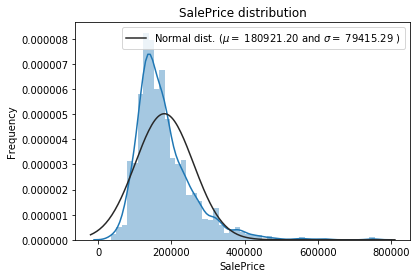

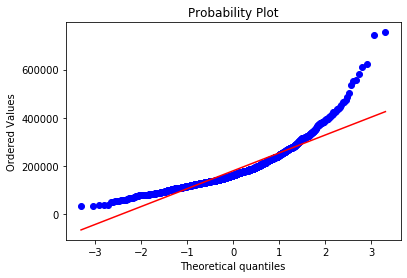

In [76]:
from scipy import stats
from scipy.stats import norm

sns.distplot(Sale_Price_copy, fit=norm);

# Getting normal distribution
(mu, sigma) = norm.fit(Sale_Price_copy)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#QQ-plot
fig = plt.figure()
res = stats.probplot(Sale_Price_copy, plot=plt)
plt.show()

На графике видно, что зависимая величина имеет правостороннее смещение (положительная асимметрия). Приведем распределение к нормальному виду с помощью логарифмического преобразования.



 mu = 12.02 and sigma = 0.40



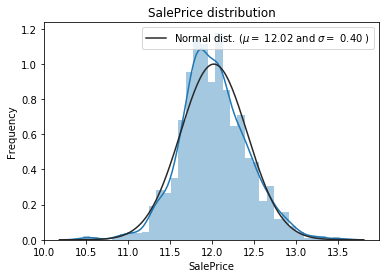

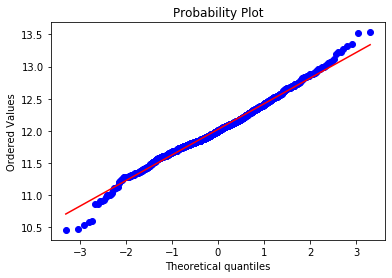

In [151]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
Sale_Price_copy = np.log1p(Sale_Price_copy)

#Check the new distribution 
sns.distplot(Sale_Price , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Sale_Price_copy)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(Sale_Price_copy, plot=plt)
plt.show()

Проверим теперь смещение распределения других признаков

In [78]:
from scipy.stats import skew

numeric_feats = Data_copy.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = Data_copy[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nСмещение в числовых признаках: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Смещение в числовых признаках: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.146034
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.931343



 mu = 1500.76 and sigma = 505.96



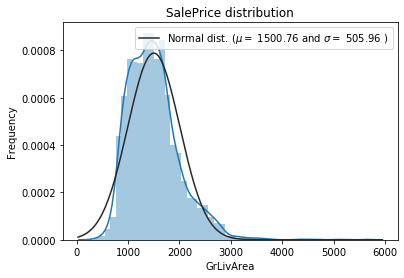

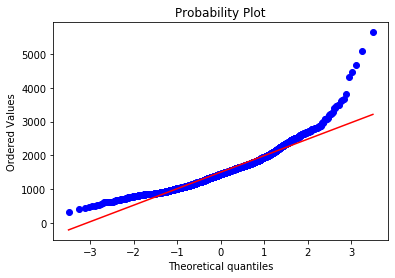

In [79]:
from scipy import stats
from scipy.stats import norm

sns.distplot(Data_copy.GrLivArea, fit=norm);

# Getting normal distribution
(mu, sigma) = norm.fit(Data_copy.GrLivArea)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#QQ-plot
fig = plt.figure()
res = stats.probplot(Data_copy.GrLivArea, plot=plt)
plt.show()

Также будем использовать логарфмическое преобразование. Также попробуем преобразование Бокса-Кокса.

In [80]:
skewness = skewness[abs(skewness) > 0.75]
print("Всего {} числовых признаков изменены преобразованием Бокса-Кокса".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    
    Data_copy[feat] = boxcox1p(Data_copy[feat], lam)
    
#Data_copy[skewed_features] = np.log1p(Data_copy[skewed_features])

Всего 36 числовых признаков изменены преобразованием Бокса-Кокса



 mu = 13.17 and sigma = 0.97



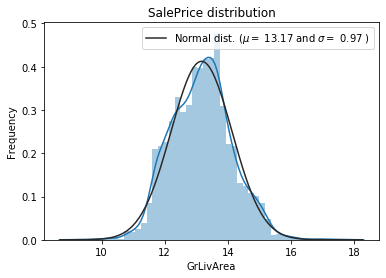

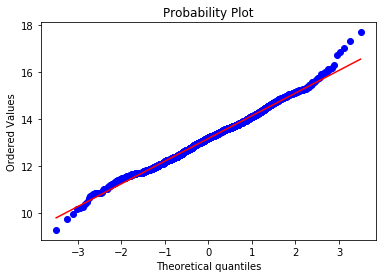

In [195]:
sns.distplot(Data_copy.GrLivArea, fit=norm);

# Getting normal distribution
(mu, sigma) = norm.fit(Data_copy.GrLivArea)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#QQ-plot
fig = plt.figure()
res = stats.probplot(Data_copy.GrLivArea, plot=plt)
plt.show()

In [81]:
Data_copy

MSSubClass MSZoning  LotFrontage    LotArea Street LotShape  \
x 0       5.684507       RL     5.831328  19.212182   Pave      Reg   
  1       3.858807       RL     6.221214  19.712205   Pave      Reg   
  2       5.684507       RL     5.914940  20.347241   Pave      IR1   
  3       5.968981       RL     5.684507  19.691553   Pave      IR1   
  4       5.684507       RL     6.314735  21.325160   Pave      IR1   
...            ...      ...          ...        ...    ...      ...   
y 1454    7.620056       RM     3.932510  14.081426   Pave      Reg   
  1455    7.620056       RM     3.932510  14.013314   Pave      Reg   
  1456    3.858807       RL     7.620056  22.782058   Pave      Reg   
  1457    6.337529       RL     5.744420  20.046557   Pave      Reg   
  1458    5.684507       RL     6.073289  19.723319   Pave      Reg   

       LandContour Utilities LotConfig LandSlope  ... OpenPorchSF  \
x 0            Lvl    AllPub    Inside       Gtl  ...    5.714669   
  1            Lvl    AllPub       FR2       Gtl  ...    0.000000   
  2            Lvl    AllPub    Inside       Gtl  ...    5.053371   
  3            Lvl    AllPub    Corner       Gtl  ...    4.745132   
  4            Lvl    AllPub       FR2       Gtl  ...    6.314735   
...            ...       ...       ...       ...  ...         ...   
y 1454         Lvl    AllPub    Inside       Gtl  ...    0.000000   
  1455         Lvl    AllPub    Inside       Gtl  ...    4.137711   
  1456         Lvl    AllPub    Inside       Gtl  ...    0.000000   
  1457         Lvl    AllPub    Inside       Gtl  ...    4.597157   
  1458         Lvl    AllPub    Inside       Mod  ...    5.285266   

       EnclosedPorch 3SsnPorch ScreenPorch PoolArea    MiscVal    MoSold  \
x 0         0.000000       0.0         0.0      0.0   0.000000  1.194318   
  1         0.000000       0.0         0.0      0.0   0.000000  2.055642   
  2         0.000000       0.0         0.0      0.0   0.000000  2.750250   
  3         8.797736       0.0         0.0      0.0   0.000000  1.194318   
  4         0.000000       0.0         0.0      0.0   0.000000  3.128239   
...              ...       ...         ...      ...        ...       ...   
y 1454      0.000000       0.0         0.0      0.0   0.000000  2.259674   
  1455      0.000000       0.0         0.0      0.0   0.000000  1.820334   
  1456      0.000000       0.0         0.0      0.0   0.000000  2.750250   
  1457      0.000000       0.0         0.0      0.0  11.147538  2.440268   
  1458      0.000000       0.0         0.0      0.0   0.000000  3.011340   

           YrSold  SaleType SaleCondition  
x 0     14.195323        WD        Normal  
  1     14.193765        WD        Normal  
  2     14.195323        WD        Normal  
  3     14.192207        WD       Abnorml  
  4     14.195323        WD        Normal  
...           ...       ...           ...  
y 1454  14.192207        WD        Normal  
  1455  14.192207        WD       Abnorml  
  1456  14.192207        WD       Abnorml  
  1457  14.192207        WD        Normal  
  1458  14.192207        WD        Normal  

[2919 rows x 75 columns]

In [82]:
X_obr=pd.get_dummies(Data_copy)
X_obr.shape

(2919, 275)

Разделяем данные обратно на тренировочную и тестовую выборки

In [83]:
Train_data_obr=X_obr.loc["x"]
Train_data_obr.shape

(1460, 275)

In [84]:
Test_data_obr=X_obr.loc["y"]
Test_data_obr.shape

(1459, 275)

Возвращаем цену в тренировочный датасет

In [159]:
Train_data_obr.insert(2,column="SalePrice",value=Sale_Price_copy)
Train_data_obr.head()

,MSSubClass,LotFrontage,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5.684507,5.831328,12.247699,19.212182,2.440268,2.055642,14.187527,14.187527,8.059126,11.170327,...,0,0,0,1,0,0,0,0,1,0
1,3.858807,6.221214,12.109016,19.712205,2.259674,2.602594,14.145138,14.145138,0.000000,12.062832,...,0,0,0,1,0,0,0,0,1,0
2,5.684507,5.914940,12.317171,20.347241,2.440268,2.055642,14.184404,14.185966,7.646538,10.200343,...,0,0,0,1,0,0,0,0,1,0
3,5.968981,5.684507,11.849405,19.691553,2.440268,2.055642,14.047529,14.135652,0.000000,8.274266,...,0,0,0,1,1,0,0,0,0,0
4,5.684507,6.314735,12.429220,21.325160,2.602594,2.055642,14.182841,14.182841,9.391827,10.971129,...,0,0,0,1,0,0,0,0,1,0


Разделяем данные на независимые переменные X и зависимую Y

In [160]:
x_obr=Train_data_obr.drop(["SalePrice"],axis=True)
y_obr=Train_data_obr["SalePrice"]


In [161]:
from sklearn.model_selection import train_test_split
x_train_obr,x_test_obr,y_train_obr,y_test_obr=train_test_split(x_obr,y_obr,test_size=.30,random_state=40)

In [162]:
GBoost = GradientBoostingRegressor(
 n_estimators = 6300,
 max_depth =  3,
 )
GBoost.fit(x_train_obr, y_train_obr)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=6300,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [163]:
Y_pred_GBoost = GBoost.predict(x_test_obr)

In [164]:
print('R2: %.2f' % r2_score(Y_pred_GBoost, y_test_obr))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(Y_pred_GBoost, y_test_obr)))
print('MAE: %.2f' % mean_absolute_error(Y_pred_GBoost, y_test_obr))

R2: 0.90
RMSE: 0.12
MAE: 0.08


В итоге получили улучшение в среднем по всему тренировочному датасету

In [165]:
kf = KFold(n_splits=5)
y_pred_GBoost = cross_val_score(GBoost, x_obr, y_obr, cv=kf, n_jobs=-1)
y_pred_GBoost.mean()

0.904502401009753

Для того, чтобы результаты лучше, необходимо более глубоко заняться обработкой признаков(Feature Engeniring), а также поэкспериментировать с выбросами

**Построение модели при помощи TensorFlow**

In [101]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error,  mean_absolute_error

Подготовим данные

In [167]:
train_tensorflow = Train_data_obr.copy()
y_train = train_tensorflow['SalePrice']
train_tensorflow

,MSSubClass,LotFrontage,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5.684507,5.831328,12.247699,19.212182,2.440268,2.055642,14.187527,14.187527,8.059126,11.170327,...,0,0,0,1,0,0,0,0,1,0
1,3.858807,6.221214,12.109016,19.712205,2.259674,2.602594,14.145138,14.145138,0.000000,12.062832,...,0,0,0,1,0,0,0,0,1,0
2,5.684507,5.914940,12.317171,20.347241,2.440268,2.055642,14.184404,14.185966,7.646538,10.200343,...,0,0,0,1,0,0,0,0,1,0
3,5.968981,5.684507,11.849405,19.691553,2.440268,2.055642,14.047529,14.135652,0.000000,8.274266,...,0,0,0,1,1,0,0,0,0,0
4,5.684507,6.314735,12.429220,21.325160,2.602594,2.055642,14.182841,14.182841,9.391827,10.971129,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5.684507,5.744420,12.072547,18.960528,2.259674,2.055642,14.181278,14.182841,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1456,3.858807,6.337529,12.254868,20.994868,2.259674,2.259674,14.148295,14.164038,7.003881,11.473247,...,0,0,0,1,0,0,0,0,1,0
1457,5.968981,5.859551,12.493133,19.476345,2.440268,2.750250,14.089451,14.192207,0.000000,8.823108,...,0,0,0,1,0,0,0,0,1,0
1458,3.858807,5.914940,11.864469,19.760176,2.055642,2.259674,14.103852,14.176584,0.000000,5.321541,...,0,0,0,1,0,0,0,0,1,0


In [168]:
train_dataset = train_tensorflow.sample(frac=0.8,random_state=1)
test_dataset = train_tensorflow.drop(train_dataset.index)

In [169]:
train_labels = train_dataset['SalePrice']
test_labels = test_dataset['SalePrice']

In [170]:
train_dataset = train_dataset.drop(columns='SalePrice')
test_dataset = test_dataset.drop(columns='SalePrice')

Будем использовать Sequential (последовательную) модель с двумя полносвязными скрытыми слоями, а выходной слой будет возвращать одно непрерывное значение.

In [171]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape =[train_dataset.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [172]:
model = build_model()

Напечатаем простое описание модели

In [173]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 64)                17664     
_________________________________________________________________
dense_67 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 65        
Total params: 21,889
Trainable params: 21,889
Non-trainable params: 0
_________________________________________________________________


Запускаем модель. Пока количестов эпох = 500

In [184]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1200


history = model.fit(train_dataset, train_labels, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Проверяем точнось модели и визуализируем процесс обучения

In [185]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
1195,0.016382,0.098221,0.016382,0.041921,0.155076,0.041921,1195
1196,0.014444,0.100496,0.014444,0.043990,0.159222,0.043990,1196
1197,0.017364,0.101171,0.017364,0.032003,0.121134,0.032003,1197
1198,0.016263,0.104760,0.016263,0.038716,0.142988,0.038716,1198
1199,0.014813,0.092858,0.014813,0.034634,0.130059,0.034634,1199


Построим график зависимости RSME от количества эпох

1460/1460 - 0s - loss: 1718675962.0384 - mae: 25425.1211 - mse: 1718675840.0000
1460/1460 - 0s - loss: 1710772423.5397 - mae: 24220.1641 - mse: 1710772352.0000
1460/1460 - 0s - loss: 842635097.6000 - mae: 18111.8242 - mse: 842635136.0000
1460/1460 - 0s - loss: 711517080.0219 - mae: 17552.5723 - mse: 711517184.0000
1460/1460 - 0s - loss: 876961689.7753 - mae: 20255.5703 - mse: 876961792.0000
1460/1460 - 1s - loss: 1162112301.7644 - mae: 18143.6484 - mse: 1162112256.0000
1460/1460 - 0s - loss: 877018716.9315 - mae: 22493.5215 - mse: 877018816.0000
1460/1460 - 0s - loss: 431999901.7205 - mae: 14215.1094 - mse: 431999808.0000
1460/1460 - 0s - loss: 390578725.4795 - mae: 14071.5850 - mse: 390578656.0000
1460/1460 - 0s - loss: 300317701.5233 - mae: 12094.7383 - mse: 300317696.0000
1460/1460 - 0s - loss: 302312158.6849 - mae: 12136.1865 - mse: 302312128.0000
1460/1460 - 0s - loss: 248954631.6274 - mae: 11134.9229 - mse: 248954656.0000
1460/1460 - 0s - loss: 297088666.1699 - mae: 12422.9434 - 

Text(0, 0.5, 'RMSE')

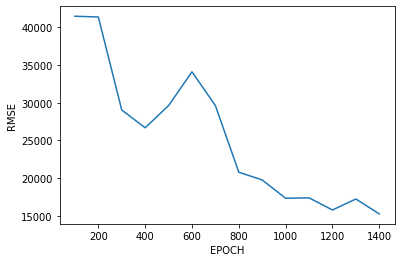

In [121]:
from sklearn.model_selection import KFold
from scipy.stats import ttest_rel
t_stats = []
n_trees = []

train_dataset_best = train_tensorflow.copy()

x_train_2 = train_dataset_best.drop(columns='SalePrice')
y_train_2 = train_dataset_best['SalePrice']

x_test_2 = train_dataset_best.drop(columns='SalePrice')
y_test_2 = train_dataset_best['SalePrice']

for j in range(100, 1500, 100):
    current_score = np.array([])
    model = build_model()
    model.fit(x_train_2, y_train_2,epochs=j, verbose=0)
    RSME_ev = model.evaluate(x_test_2,y_test_2, verbose=2)
    #print('Model evaluation ',a)
    current_score = current_score = np.append(current_score, np.sqrt(RSME_ev[2]))
    t_stats.append(current_score)
    n_trees.append(j)
plt.plot(n_trees, t_stats)
plt.xlabel('EPOCH')
plt.ylabel('RMSE')

посмотрим как наша модель справится на тестовой выборке, которую мы еще не использовали при обучении модели. Эта проверка покажет нам какого результата ожидать от модели, когда мы будем ее использовать в реальном мире

In [191]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set RSME: {:5.2f} ".format(np.sqrt(mse)))
print("Testing set MAE: {:5.2f} ".format(mae))

292/292 - 0s - loss: 0.0227 - mae: 0.1130 - mse: 0.0227
Testing set RSME:  0.15 
Testing set MAE:  0.11 


Сделаем прогноз и построим график

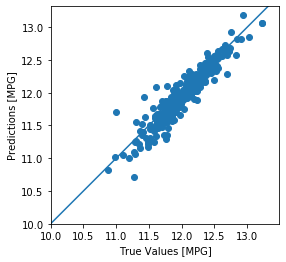

In [192]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([10,plt.xlim()[1]])
plt.ylim([10,plt.ylim()[1]])
_ = plt.plot([0, 20], [0, 20])



Проверим распределение ошибки. 

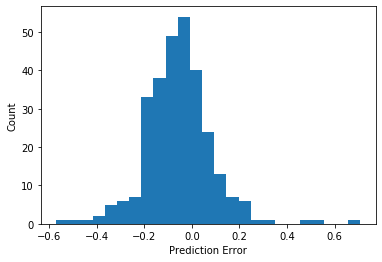

In [193]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")